In [1]:
##############################################################
#  WARNING, EXECUTE THIS LINE BEFORE EXEsCUTING ANY ROS CODE #
#                                                            #
#             source opt/ros/foxy/setup.bash                 #
#                                                            #
##############################################################

In [2]:
from __future__ import absolute_import, division, print_function# need to undestend their utility <-------- UNKNOWN
import tensorflow as tf
import keras# dont import keras ftom tensorflow library otherwise the code below will fail
from sklearn.model_selection import train_test_split
import numpy as np
from keras_visualizer import visualizer# used to visualize the neural network <-------------------- MORE INFORMATION
from tensorflow.keras.utils import plot_model# used to plot the neural network model <------------------MORE INFO
import matplotlib.pyplot as plt# this library will be used for data visualization

TestSize = 0.1# size of the test set

percent = 0.2# percentage of data we want to give to our system from all the data aveilable
# we start to take them from the start of the dataset , one after one)

LukyNumber = 4# the number that in this session will be associated to 1 while the others will be set to 0
# (we set all the other numbers to zero becouse otherwise the neural network behave incorrectly with thos libraries)

2022-06-24 23:55:42.864131: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-06-24 23:55:42.864175: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


In [3]:
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()
# import the dataset "mnist" that contains all the images of the numbers
# and relatives lables an then assine all those data to two sets ( training set and test set )

# adjusting the type of the data contained in the arrays
y_train = y_train.astype(np.int8)
y_test = y_test.astype(np.int8)

In [4]:
# I want to see some information about my data and they format
print(type(x_train))# return the typology of our data set of images
print(len(x_train))# retunr the lenth of the data set ( how much images we have )
print(np.shape(x_train))# return the shape of the data set, in our case we have the
# lenth and then the dimensions of the images

print(type(x_test))# return the typology of our training set of images
print(len(x_test))# retunr the lenth of the training set ( how much images we have )
print(np.shape(x_test))# return the shape of the training set, in our case we have the
# lenth and then the dimensions of the images

#print(dir(np))
#print(help(np.concatenate))

<class 'numpy.ndarray'>
60000
(60000, 28, 28)
<class 'numpy.ndarray'>
10000
(10000, 28, 28)


In [5]:
'''                             I HAVE TO CHECK IF THIS PART OF THE CODE IS CORRECT                            '''

#                                    Reduction of the dataset dimension

x_total_temp = np.append(x_train, x_test, axis=0)# CHECK IF THE PARTS ARE APPENDED CORRECTLY <------------- WARNING
print("Shape of x_total_temp: {0}".format(np.shape(x_total_temp)))

x_total = x_total_temp[0: int(np.shape(x_total_temp)[0]*percent)]
print("Shape of x_total reduced to {1}: {0}".format(np.shape(x_total), percent))

y_total_temp = np.append(y_train, y_test, axis=0)# CHECK IF THE PARTS ARE APPENDED CORRECTLY <------------- WARNING
print("Shape of y_total_temp: {0}".format(np.shape(y_total_temp)))

y_total = y_total_temp[0: int(np.shape(y_total_temp)[0]*percent)]
print("Shape of y_total reduced to {1}: {0}".format(np.shape(y_total), percent))

Shape of x_total_temp: (70000, 28, 28)
Shape of x_total reduced to 0.2: (14000, 28, 28)
Shape of y_total_temp: (70000,)
Shape of y_total reduced to 0.2: (14000,)


In [6]:
"""                                       THE ERROR COULD BE HERE                                                """
# Redistribution of the data in two sets ( test and train)
x_train, x_test, y_train, y_test = train_test_split(x_total, y_total, test_size=TestSize)

In [7]:
"""                                       THE ERROR COULD BE HERE                                                """
#                                     Assignment of values [1, -1]

# REWRITE THE CODE BECAUSE IT ISNT EFFISCENT ENOUGH (nested for loops or something else)

for i in range(0, np.shape(y_train)[0]):# <-------------------------------------------------- WARNING (use iterator)
    if y_train[i] == LukyNumber:
        y_train[i] = 1
    else:
        y_train[i] = -1
        
for i in range(0, np.shape(y_test)[0]):# <-------------------------------------------------- WARNING (use iterator)
    if y_test[i] == LukyNumber:
        y_test[i] = 1
    else:
        y_test[i] = -1
print(y_test.dtype)

int8


In [8]:
# TEST TO SEE THE SHAPE OF THE DATA
print("Lenth of y_train : {}\n".format(len(y_train)))
print("Shape of y_train : {}\n".format(np.shape(y_train)))
print("y_training : {}\n".format(y_train))

print("Lenth of y_test : {}\n".format(len(y_test)))
print("Shape of y_test : {}\n".format(np.shape(y_test)))
print("y_test : {}\n".format(y_test))

# I WANT TO SEE THE SHAPE OF PICTURES
print("Lenth of x_train : {}\n".format(len(x_train)))
print("Shape of x_train : {}\n".format(np.shape(x_train)))
print("x_train : {}\n".format(x_train))

print("Lenth of x_test : {}\n".format(len(x_test)))
print("Shape of x_test : {}\n".format(np.shape(x_test)))
print("x_test : {}\n".format(x_test))

Lenth of y_train : 12600

Shape of y_train : (12600,)

y_training : [-1 -1 -1 ... -1 -1 -1]

Lenth of y_test : 1400

Shape of y_test : (1400,)

y_test : [-1 -1 -1 ... -1  1 -1]

Lenth of x_train : 12600

Shape of x_train : (12600, 28, 28)

x_train : [[[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]

 [[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]

 [[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]

 ...

 [[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]

 [[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]

 [[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0

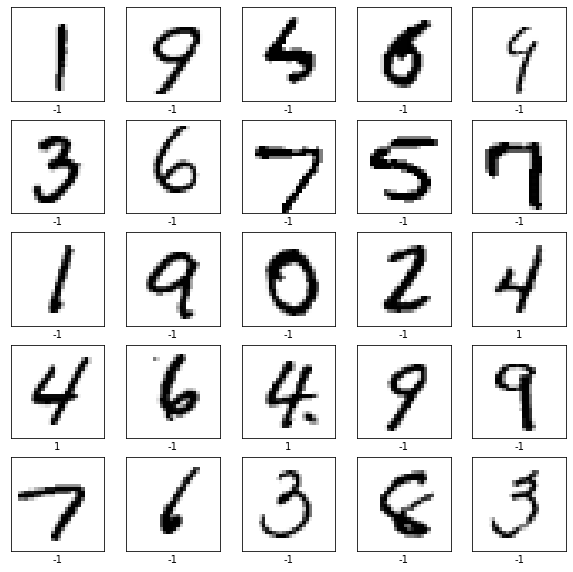

In [9]:
# display the first 25 training images with labels and verify that the data is in the correct formate.
plt.figure(figsize=(10,10))# <--------------------------------------------------------------------------- UNKNOWN
for i in range(25):# i want to plot 25 images
    plt.subplot(5,5,i+1)# the letter "i" rappresent the position 
    plt.xticks([])# <------------------------------------------------------------------------------------ UNKNOWN
    plt.yticks([])
    plt.grid(False)# in this way i will not have the grid in on the images
    plt.imshow(x_train[i], cmap=plt.cm.binary)# load the image and make it show black and white
    plt.xlabel(y_train[i])# add the lable associated to that image under it
plt.show()# show all the images

In [10]:
# HERE I RESHAPE THE IMAGES FROM A MATRIX TO A VECTOR MANTAINING THE DATA CONTENT
SrecchedDatasetX = np.reshape(x_train, (np.shape(x_train)[0], 784))# the dataset has 11200 elements, you have to make this part of code more general

# TEST TO SEE THE SHAPE OF THE DATA
print("Lenth of y_training : {}\n".format(len(y_train)))
print("Shape of y_training : {}\n".format(np.shape(y_train)))
print("y_training : {}\n".format(y_train))

# I WANT TO SEE THE SHAPE OF PICTURES
print("Lenth of x_training : {}\n".format(len(SrecchedDatasetX)))
print("Shape of x_training : {}\n".format(np.shape(SrecchedDatasetX)))
print("x_training : {}\n".format(SrecchedDatasetX))

Lenth of y_training : 12600

Shape of y_training : (12600,)

y_training : [-1 -1 -1 ... -1 -1 -1]

Lenth of x_training : 12600

Shape of x_training : (12600, 784)

x_training : [[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]



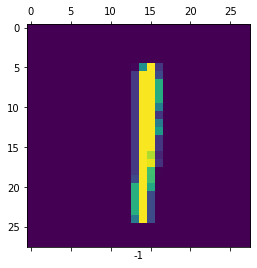

In [11]:
# HERE I TEST THE CONVERSION GOING BACKWARD (CHEKING IF THE IMAGE IS CORRECT)
#print(SrecchedDatasetX[1])
prova = np.reshape(SrecchedDatasetX[int(0)], (28, 28))# here at index you can put whatewer number you wish to see if the conversion went correctly
plt.matshow(prova)
plt.xlabel(y_train[0])
plt.show()

The erlier part was a preprocessing of the data, now we will use distributed gradient traking for the training of the neural network.
-

In [12]:
# example 
def adder(a: float, b: float) -> float:
    return float(a+b)
#type(adder(3, 5))

#NNShape = np.array([784, 10, 10, 10, 1])
#a = np.zeros(tuple(NNShape))
#print("\nshape of a: {0}".format(np.shape(a)))

In [13]:
# https://ojs.aaai.org/index.php/AAAI/article/download/7178/7032
###############################################################################

# this array rappresents the shape of our neural network
# each i-th element of the array says how much neurons has that layer
# the first layer has 784 neurons becouse is the layer rappresenting the vectorazed image
# the last layer is composed by one neuron becouse it will say if the image contains the LukyNumber or not
NNShape = np.array([784, 10, 10, 10, 1])

# Training Set
label_point = y_train # D = x0
data_point = SrecchedDatasetX # y = xT = phi (ustar)

# Gradient Method Parameters
max_iters = 10 # epochs
stepsize = 0.1 # learning rate

###############################################################################
# Activation Function
def sigmoid_fn(xi: float) -> float:
  return 1/(1+np.exp(-xi))

# Derivative of Activation Function
def sigmoid_fn_derivative(xi: float) -> float:
  return sigmoid_fn(xi)*(1-sigmoid_fn(xi))

# Calculate the output of one layer of neurons given the input of previous layer and the weiths
def inference_dynamics(xt: np.array, ut: np.array, d: np.array, WhereIAm: int) -> np.array:
  """
    input: 
              xt -> previous layer resoults
              ut -> current layer weiths
              d  -> array containing the number of nodes of each layer
              WhereIAm -> integer that says which layer you have selected now
    output: 
              xtp -> output of this layer
  """
  # allocate space for the output ( input of the next layer )
  xtp = np.zeros(d[WhereIAm+1])# here i am looking for the number of neurons of the next layer

  #print("WhereIAm: {0}\n".format(WhereIAm))
  #print("shape of xtp: {0}\n".format(np.shape(xtp)))
  #print("shape of d[WhereIAm]: {0}\n".format(np.shape(d)))
  #print("shape of xt: {0}\n".format(np.shape(xt)))
  #print("shape of ut: {0}\n".format(np.shape(ut)))

  #print("xtp: {0}\n".format(xtp))
  #print("d[WhereIAm]: {0}\n".format(d[WhereIAm]))
  #print("xt: {0}\n".format(xt))
  #print("ut: {0}\n".format(ut))
  for ell in range(d[WhereIAm+1]):# for each node of this layer compute those operations
    temp = xt@ut[ell,:]# calculate the output of the neuron including the bias
    xtp[ell] = sigmoid_fn(temp) # x' * u_ell. . Calculate the output of one neuron and put it in the next layer
  return xtp

# Calculation of layers of neurons output for each layer untill the end
def forward_pass(uu: list, x0: np.array, d: np.array) -> list:
  """
    input: 
              uu -> tensor containing all the weiths of the neural network
              x0 -> input of neural network (in this case the vectorized image)
              d -> array containing the number of nodes of each layer
    output: 
              xx -> output of our neurla network
  """
  # allocate the memory for the resoults of the whole neural network.
  xx = list()# here i create a tensor of shape [784, 10, 10, 10, 1] containing only zeros
  for i in range(0, len(d)):# i start from 1 becouse in the layer zero we ahve the vectorized image
    xx.append(np.zeros(d[i]))
    
  xx[0] = x0# this is the first layer of the neural network. It has to bee the image (vector rappresenting the image)

  for t in range(np.shape(d)[0]-1):
    # calculate the resoults of the computation of the whole neural network
    xx[t+1] = inference_dynamics(xx[t],uu[t], d, t)# i put t becouse we skip the firs layer ?
  return xx
  

'''
# Adjoint dynamics: 
#   state:    lambda_t = A.T lambda_tp
#   output: deltau_t = B.T lambda_tp
def adjoint_dynamics(ltp,xt,ut):
  """
    input: 
              llambda_tp current costate
              xt current state
              ut current input
    output: 
              llambda_t next costate
              delta_ut loss gradient wrt u_t
  """
  df_dx = np.zeros((d,d))

  # df_du = np.zeros((d,(d+1)*d))
  Delta_ut = np.zeros((d,d+1))

  for j in range(d):
    dsigma_j = sigmoid_fn_derivative(xt@ut[j,1:] + ut[j,0]) 

    df_dx[:,j] = ut[j,1:]*dsigma_j
    # df_du[j, XX] = dsigma_j*np.hstack([1,xt])
    
    # B'@ltp
    Delta_ut[j,0] = ltp[j]*dsigma_j
    Delta_ut[j,1:] = xt*ltp[j]*dsigma_j
  
  lt = df_dx@ltp # A'@ltp
  # Delta_ut = df_du@ltp

  return lt, Delta_ut
'''

# Backward Propagation
def backward_pass(xx: list,uu: list, llambdaT: float):
  """
    input: 
              xx state trajectory: x[1],x[2],..., x[T]
              uu input trajectory: u[0],u[1],..., u[T-1]
              llambdaT terminal condition
    output: 
              llambda costate trajectory
              delta_u costate output, i.e., the loss gradient
  """
  llambda = np.zeros((T,d))
  llambda[-1] = llambdaT

  Delta_u = np.zeros((T-1,d,d+1))

  for t in reversed(range(T-1)): # T-2,T-1,...,1,0
    llambda[t], Delta_u[t] = adjoint_dynamics(llambda[t+1],xx[t],uu[t])

  return Delta_u

  
###############################################################################
# MAIN
###############################################################################

J = np.zeros(max_iters)                       # Vector containing the evolution of the cost

ListContainingWeithsTensor = list()# -> it is a list containing the matrices used for inference dynamics
for i in range(0, len(NNShape)-1):
    ListContainingWeithsTensor.append(np.random.randn(NNShape[i+1], NNShape[i]))
    
def GetTensorWeithsData(ListOfMatrices: list) -> None:
    print("The lenth of the List of matrices is {0}".format(len(ListContainingWeithsTensor)))
    print("It's type is: {0}\n".format(type(ListContainingWeithsTensor)))
    for i in range(0, len(ListOfMatrices)):
        print("The type of {0}° element is {1}".format(i, type(ListContainingWeithsTensor[i])))
        print("While the shape is {0}\n".format(np.shape(ListContainingWeithsTensor[i])))
    return None

#GetTensorWeithsData(ListContainingWeithsTensor)
                
# Initial Weights / Initial Input Trajectory
uu = ListContainingWeithsTensor# uu is the tensor containing all the waiths of the neural network ???

# Initial State Trajectory
xx = forward_pass(uu,data_point[0], NNShape) # T x d . we pass once the data to the to our neural network

# GO!
for k in range(max_iters):
  if k%10 == 0:
    print('Cost at k={:d} is {:.4f}'.format(k,J[k-1]))

  # Backward propagation
  llambdaT = 2*( xx[-1] - label_point[0]) # xT . LambdaT = 2*(-LablePoint)
  Delta_u = backward_pass(xx,uu,llambdaT) # the gradient of the loss function 
  
  # Update the weights
  uu = uu - stepsize*Delta_u # overwriting the old value
  
  # Forward propagation
  xx = forward_pass(uu, data_point[0], NNShape)# <------------------------------------------------------ OK
  
  # Store the Loss Value across Iterations
  # here he compute the squere of the error, (value of the last node minus the lable)^2
  # xx[-1] is the last value of the node of the neural network
  J[k] = (xx[-1] - label_point[0])@(xx[-1] - label_point[0]) # it is the cost at k+1. <----------------- OK
  # np.linalg.norm( xx[-1,:] - label_point[0] )**2

_,ax = plt.subplots()
ax.plot(range(max_iters),J)
plt.show()

/tmp/ipykernel_5272/3278228246.py:21: RuntimeWarning: overflow encountered in exp
  return 1/(1+np.exp(-xi))


Cost at k=0 is 0.0000


NameError: name 'T' is not defined

In [ ]:
print(len(xx))
#plt.matshow(np.reshape(xx[0], (28, 28)))
#plt.matshow(np.reshape(xx[1], (np.shape(xx[1])/2, 2)))
#plt.show()
print(xx[4])
print(xx[-1])

In [ ]:
xt = np.array([0.77687937, 0.08063935, 0.01138057, 0.122775, 0.45234997, 0.31188696, 0.90724203, 0.56045335, 0.77011777, 0.47297238])
ut = np.array([3.5497876, 0.80632542, 0.42563381, 1.14425937, -0.30383338, -1.75322509, 0.22340017, -0.55091153, 0.57918906, -1.25920521])
resoult = xt@ut
resoult = sigmoid_fn(resoult)
print(resoult)

In [ ]:
plt.matshow(x_train[99])# i wanted to see the 100 image 
plt.colorbar()# i want to have the gradueted bar with colors
plt.grid(False)# i dont want to have a grid on the image
plt.xlabel(y_train[99])# write the number on the photo on x axis
plt.show()# show the image

In [ ]:
x_train = x_train/255# used for scaling of the numbers rappresenting the color of the image
# its a good practice becouse otherwise we will operete with very large numbers and this will
# give us problems ( overflow )

In [ ]:
# same thing as above ( just to see if the conversion were done correctly )
plt.matshow(x_train[99])
plt.colorbar()
plt.grid(False)
plt.xlabel(y_train[99])
plt.show()

In [ ]:
# display the first 25 training images with labels and verify that the data is in the correct formate.
plt.figure(figsize=(10,10))# <--------------------------------------------------------------------------- UNKNOWN
for i in range(25):# i want to plot 25 images
    plt.subplot(5,5,i+1)# the letter "i" rappresent the position 
    plt.xticks([])# <------------------------------------------------------------------------------------ UNKNOWN
    plt.yticks([])
    plt.grid(False)# in this way i will not have the grid in on the images
    plt.imshow(x_train[i], cmap=plt.cm.binary)# load the image and make it show black and white
    plt.xlabel(y_train[i])# add the lable associated to that image under it
plt.show()# show all the images

In [ ]:
# Creation of the structure of neural network
# (i dont know which activation function is the best for this problem same for the inner and last layer dimensions)
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)), # this layer will convert two dimetional (2d) array (image of 28x28 pixels) in to a one dimentional array of 28*28 = 784pixels.
    keras.layers.Dense(10, activation=tf.nn.softmax)# last layer has 10 neurons, with softmax as activation function
])

In [ ]:
# Configuration of neural network 
model.compile(optimizer='adam',# we have seen it duering the lessosn
             loss='sparse_categorical_crossentropy',# <---------------------------------------------------- UNKNOWN
             metrics=['accuracy'])# <---------------------------------------------------------------------- UNKNOWN

In [ ]:

#from ann_visualizer.visualize import ann_viz;

#ann_viz(model, title="My first neural network")

#visualizer(model, format='png', view=True)# this give us an error
#plot_model(model, to_file='model.png')



In [ ]:
# training of the model 
model.fit(x_train, y_train, epochs=1)# we do the training for only one epoch

In [ ]:
# Evaluate accuracy
test_loss, test_acc = model.evaluate(x_test, y_test)# test the model on our test set
print('test accuracy:{0}\ntest loss:{1}'.format(test_acc, test_loss))

In [ ]:

for layer in model.layers: print(layer.get_config(), layer.get_weights())
    

In [ ]:

print("Number of layers: {0}".format(len(layer.get_weights())))
print("First layer shape: {0}".format(np.shape(layer.get_weights()[0])))
#print("Second layer shape: {0}".format(np.shape(layer.get_weights()[1])))


In [ ]:
# Prediction for single images

# we know that y_test[kk] image is something, we want to see if our neural networck predict it correctly
kk = 9# image number in the training set thet we want to check
img = x_test[kk]
# print(img.shape)  # shape (28, 28)

# tf.keras model are optimized to make predictions for batch or collection of test data at once. So we need to add it to a list:
img_list = np.expand_dims(img,0)
# print(img_list)   # shape (1, 28, 28)

predictions_single = model.predict(img_list)# performe the prediction

plt.matshow(x_test[kk])
plt.colorbar()
plt.grid(False)
plt.xlabel("The lable is: {0}\nwhile the predicted value is:{1}".format(y_test[kk], np.argmax(predictions_single)))
plt.show()